In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
params = {
    'IC': 3840000,
    'G': 250000, 
    'theta': 0.8,
    'n': 15,
    'phi': 0.5,
    'sigma_H': 0.25, 
    'sigma_K': 0.01, 
    'alpha_E': 0.0523,
    'sigma_E': 0.0856,
    'delta': 1.025,
    'H0': 0.0036,
    'K0': 0.43,
    'PE0': 0.24,
    'N': 25,
    'alpha': 0.05,
    'beta': 0.2,
    'r0': 0.031,
    'rR': 0.031,
    'rP': 0.031,
    'rE': 0.06,
    'rho': -20,
    'eps_H': 0.01,
    'eps_P': 0.01,
    'eps_K': 0.01
    }

In [3]:
def evaluate_KPIs(params):
    IC = params['IC']
    sigma_H = params['sigma_H']
    sigma_K = params['sigma_K']
    alpha_E = params['alpha_E']
    sigma_E = params['sigma_E']
    delta = params['delta']
    H0 = params['H0']
    K0 = params['K0']
    PE0 = params['PE0']
    N = params['N']
    alpha = params['alpha']
    beta = params['beta']
    r0 = params['r0']
    rR = params['rR']
    rP = params['rP']
    rE = params['rE']
    rho = params['rho']
    eps_H = params['eps_H']
    eps_P = params['eps_P']
    eps_K = params['eps_K']
    phi = params['phi']
    theta = params['theta']
    n = params['n']
    G = params['G']

    t = np.arange(N+1)

    H = IC*H0*np.exp((-np.square(sigma_H)*t/2)+(sigma_H*eps_H*np.sqrt(t)))
    I_OM = (1/delta)*H

    I = np.zeros(N+1)
    I = copy.deepcopy(I_OM)
    I[0] = IC    

    PE = PE0*np.exp((alpha_E-(np.square(sigma_E)/2))*t+sigma_E*eps_P*np.sqrt(t))
    K = IC*K0*np.exp((-np.square(sigma_K)*t/2)+(sigma_K*eps_K*np.sqrt(t)))
    f = np.log(N + 1 - t)/np.log(N)

    b = phi/(1 - np.exp(-100/rho))
    a = 1 - b
    Re = a + b*np.exp(-(200*theta-100)/rho)
    Q = f*Re*K

    R_hat = Q*PE
    R_hat[0] = 0
    R = R_hat

    R_E = np.zeros(N+1)
    for i in np.arange(1, n+1):
        R_E[i] = R[i] - alpha*G - np.max([0, beta*(R[i]-G)]) 

    R_R = np.zeros(N+1)
    for i in np.arange(1, n+1):
        R_R[i] = (1-theta)*(alpha*G + np.max([0, beta*(R[i]-G)]))
    for i in np.arange(n+1, N+1):
        R_R[i] = (1-theta)*R[i]
    
    R_O = np.zeros(N+1)
    for i in np.arange(1, n+1):
        R_O[i] = theta*(alpha*G + np.max([0, beta*(R[i]-G)]))
    R_O[(n+1):(N+1)] = R[(n+1):(N+1)] - R_R[(n+1):(N+1)]  

    NPVR = np.zeros(N+1)
    NPVR[0] = 0
    for i in np.arange(1, N+1):
        NPVR[i] = R_R[i]/pow((1+rR), i)
    NPV_R = sum(NPVR)

    NPV0 = np.zeros(N+1)
    NPV0[0] = 0
    for i in np.arange(1, N+1):
        NPV0[i] = (R_O[i] - I_OM[i])/pow((1+r0), i)
    NPV_0 = sum(NPV0)

    NPVE = np.zeros(n+1)
    NPVE[0] = -IC
    for i in np.arange(1, n+1):
        NPVE[i] = (R_E[i] - I_OM[i])/pow((1+rE), i)    
    NPV_E = sum(NPVE)

    NPVP = np.zeros(N+1)
    for i in np.arange(1, N+1):
        NPVP[i] = (R[i] - I[i])/pow((1+rP), i)    
    NPV_P = sum(NPVP)

    return NPV_R, NPV_0, NPV_E, NPV_P, R, R_E, R_R, R_O, PE, f, Re, K, Q, R

In [4]:
def simulation (params, theta_min, theta_max, N):
    NPV_R = list()
    NPV_0 = list()
    NPV_E = list()
    NPV_P = list()
    duration = list()
    thetas = list()
    vec_Re = list()
    delta_theta = (theta_max - theta_min)/N
    for i in range(N):
        theta = theta_min + delta_theta*i
        thetas.append(theta)
        params['theta'] = theta
        NPVR, NPV0, NPVE, NPVP, R, R_E, R_R, R_O, PE, f, Re, K, Q, R = evaluate_KPIs(params)
        NPV_R.append(NPVR/1e6)
        NPV_0.append(NPV0/1e6)
        NPV_E.append(NPVE/1e6)
        NPV_P.append(NPVP)
        duration.append(params['n'])
        vec_Re.append(Re)
    theta_opt = theta_min + delta_theta*NPV_0.index(max(NPV_0))
    return NPV_R, NPV_0, NPV_E, NPV_P, R, R_E, R_R, R_O, PE, f, Re, K, Q, R, vec_Re, thetas, theta_opt


In [5]:
theta_min = 0.5
theta_max = 1
N = 100

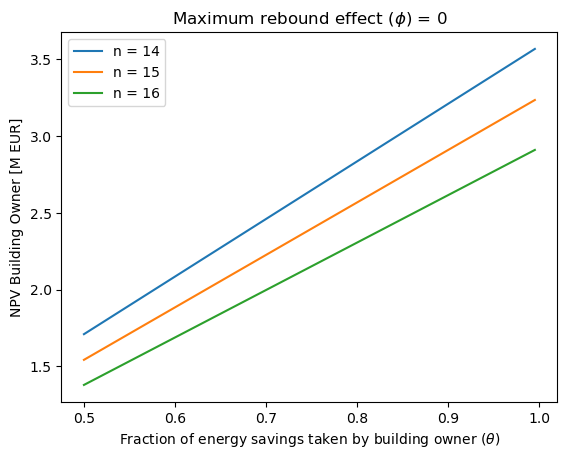

In [6]:
params['phi'] = 0
params['n'] = 14
NPVR_14_1, NPV0_14_1, NPVE_14_1, NPVP, R, R_E, R_R, R_O, PE, f, Re, K, Q, R, vec_Re_14_1, thetas, theta_opt_14_1 = simulation(params, theta_min, theta_max, N)
plt.plot(thetas, NPV0_14_1)
params['n'] = 15
NPVR_15_1, NPV0_15_1, NPVE_15_1, NPVP, R, R_E, R_R, R_O, PE, f, Re, K, Q, R, vec_Re_15_1, thetas, theta_opt_15_1 = simulation(params, theta_min, theta_max, N)
plt.plot(thetas, NPV0_15_1)
params['n'] = 16
NPVR_16_1, NPV0_16_1, NPVE_16_1, NPVP, R, R_E, R_R, R_O, PE, f, Re, K, Q, R, vec_Re_16_1, thetas, theta_opt_16_1 = simulation(params, theta_min, theta_max, N)
plt.plot(thetas, NPV0_16_1)
plt.xlabel(r'Fraction of energy savings taken by building owner ($\theta$)')
plt.ylabel('NPV Building Owner [M EUR]')
plt.legend(['n = 14', 'n = 15', 'n = 16'])
plt.title(r'Maximum rebound effect ($\phi$) = 0')
plt.show()

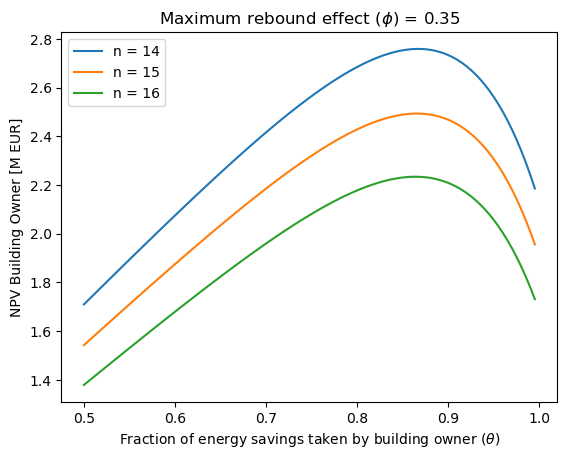

In [7]:
params['phi'] = 0.35
params['n'] = 14
NPVR_14_2, NPV0_14_2, NPVE_14_2, NPVP, R, R_E, R_R, R_O, PE, f, Re, K, Q, R, vec_Re_14_2, thetas, theta_opt_14_2 = simulation(params, theta_min, theta_max, N)
plt.plot(thetas, NPV0_14_2)
params['n'] = 15
NPVR_15_2, NPV0_15_2, NPVE_15_2, NPVP, R, R_E, R_R, R_O, PE, f, Re, K, Q, R, vec_Re_15_2, thetas, theta_opt_15_2 = simulation(params, theta_min, theta_max, N)
plt.plot(thetas, NPV0_15_2)
params['n'] = 16
NPVR_16_2, NPV0_16_2, NPVE_16_2, NPVP, R, R_E, R_R, R_O, PE, f, Re, K, Q, R, vec_Re_16_2, thetas, theta_opt_16_2 = simulation(params, theta_min, theta_max, N)
plt.plot(thetas, NPV0_16_2)
plt.xlabel(r'Fraction of energy savings taken by building owner ($\theta$)')
plt.ylabel('NPV Building Owner [M EUR]')
plt.legend(['n = 14', 'n = 15', 'n = 16'])
plt.title(r'Maximum rebound effect ($\phi$) = 0.35')
plt.show()

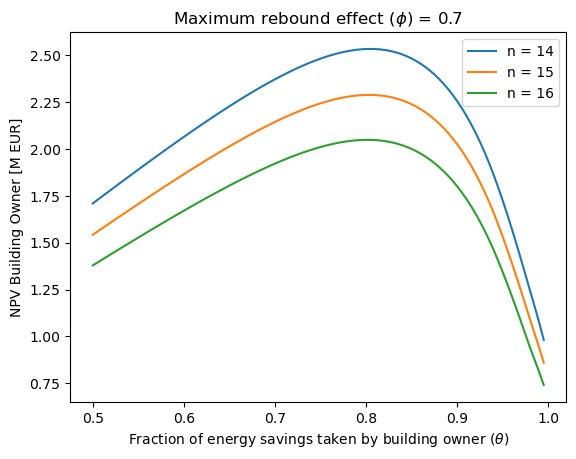

In [8]:
params['phi'] = 0.7
params['n'] = 14
NPVR_14_3, NPV0_14_3, NPVE_14_3, NPVP, R, R_E, R_R, R_O, PE, f, Re, K, Q, R, vec_Re_14_3, thetas, theta_opt_14_3 = simulation(params, theta_min, theta_max, N)
plt.plot(thetas, NPV0_14_3)
params['n'] = 15
NPVR_15_3, NPV0_15_3, NPVE_15_3, NPVP, R, R_E, R_R, R_O, PE, f, Re, K, Q, R, vec_Re_15_3, thetas, theta_opt_15_3 = simulation(params, theta_min, theta_max, N)
plt.plot(thetas, NPV0_15_3)
params['n'] = 16
NPVR_16_3, NPV0_16_3, NPVE_16_3, NPVP, R, R_E, R_R, R_O, PE, f, Re, K, Q, R, vec_Re_16_3, thetas, theta_opt_16_3 = simulation(params, theta_min, theta_max, N)
plt.plot(thetas, NPV0_16_3)
plt.xlabel(r'Fraction of energy savings taken by building owner ($\theta$)')
plt.ylabel('NPV Building Owner [M EUR]')
plt.legend(['n = 14', 'n = 15', 'n = 16'])
plt.title(r'Maximum rebound effect ($\phi$) = 0.7')
plt.show()

In [9]:
def theta_opt(n, N, phi_min, phi_max):
    phis = list()
    thetaopt = list()
    NPV0_max = list()
    params['n'] = n
    delta_phi = (phi_max - phi_min)/N
    theta_min = 0.5
    theta_max = 1
    M = 1000
    for i in range(N):
        phi = phi_min + delta_phi*i
        phis.append(phi)
        params['phi'] = phi
        NPVR, NPV0, NPVE, NPVP, R, R_E, R_R, R_O, PE, f, Re, K, Q, R, vec_Re, thetas, theta_opt = simulation(params, theta_min, theta_max, M)
        thetaopt.append(theta_opt)
        for j in range(len(thetas)):
            if thetas[j] == theta_opt:
                ind = j
        NPV0_max.append(NPV0[ind])
    return phis, thetaopt, NPV0_max

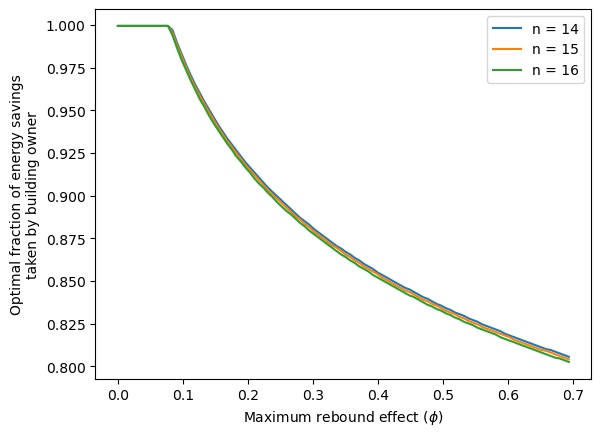

In [10]:
phis, theta_opt_14, NPV0_max_14 = theta_opt(14, 100, 0, 0.7)
plt.plot(phis, theta_opt_14)
plt.xlabel(r'Maximum rebound effect ($\phi$)')
plt.ylabel('Optimal fraction of energy savings\ntaken by building owner')
phis, theta_opt_15, NPV0_max_15 = theta_opt(15, 100, 0, 0.7)
plt.plot(phis, theta_opt_15)
phis, theta_opt_16, NPV0_max_16 = theta_opt(16, 100, 0, 0.7)
plt.plot(phis, theta_opt_16)
plt.legend(['n = 14', 'n = 15', 'n = 16'])
plt.show()

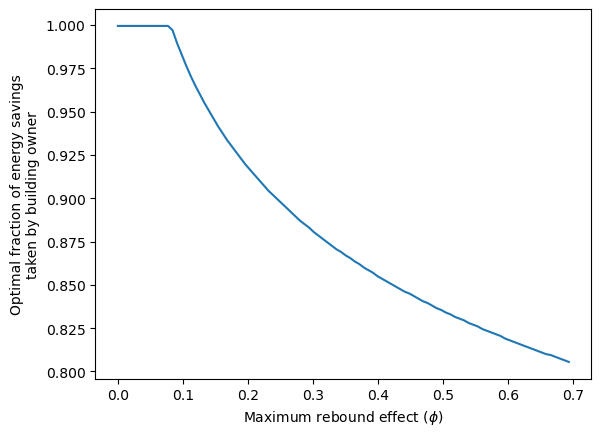

In [11]:
plt.plot(phis, theta_opt_14)
plt.xlabel(r'Maximum rebound effect ($\phi$)')
plt.ylabel('Optimal fraction of energy savings\ntaken by building owner')
plt.show()

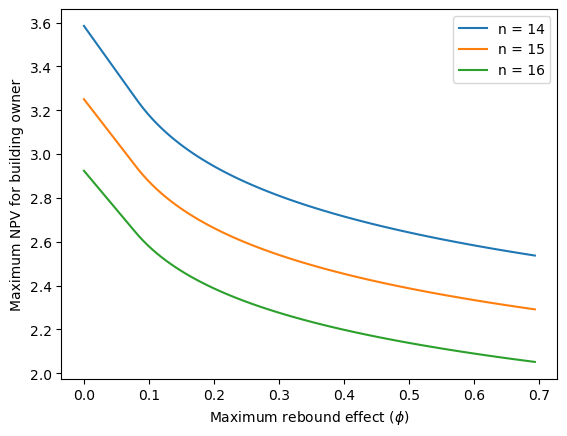

In [12]:
plt.plot(phis, NPV0_max_14)
plt.plot(phis, NPV0_max_15)
plt.plot(phis, NPV0_max_16)
plt.xlabel(r'Maximum rebound effect ($\phi$)')
plt.ylabel('Maximum NPV for building owner')
plt.legend(['n = 14', 'n = 15', 'n = 16'])
plt.show()